### Imports

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, BatchNormalization, Dropout, Flatten, MaxPooling2D
import PIL
import os
import cv2
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

### Load Dataset

In [2]:
root_dir = 'C:\\Users\\Lenovo\\Documents\\Github\\Datasets\\human-detection-dataset'

In [3]:
positive_images = []
positive_images_path = os.path.join(root_dir, '1')
negative_images = []
negative_images_path = os.path.join(root_dir, '0')

In [4]:
for img_name in os.listdir(positive_images_path):
    img_path = os.path.join(positive_images_path, img_name)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256, 256))
    positive_images.append(img_resized)

In [5]:
for img_name in os.listdir(negative_images_path):
    img_path = os.path.join(negative_images_path, img_name)
    img = cv2.imread(img_path)
    img_resized = cv2.resize(img, (256, 256))
    negative_images.append(img_resized)

In [6]:
#Create labels
positive_labels = [1 for i in range(len(positive_images))]
negative_labels = [0 for i in range(len(negative_images))]

In [7]:
images = np.concatenate((np.array(positive_images), np.array(negative_images)), axis=0)
labels = np.concatenate((np.array(positive_labels), np.array(negative_labels)), axis=0)

In [8]:
# Shuffle data for training
data = list(zip(images, labels))
random.shuffle(data)
images, labels = zip(*data)

#convert data to numpy
images = np.array(images)
labels = np.array(labels)

In [9]:
print(f'images shape : {images.shape}')
print(f'labels shape : {labels.shape}')

images shape : (921, 256, 256, 3)
labels shape : (921,)


### Normalization

In [10]:
images_norm = images/255

### Visualization

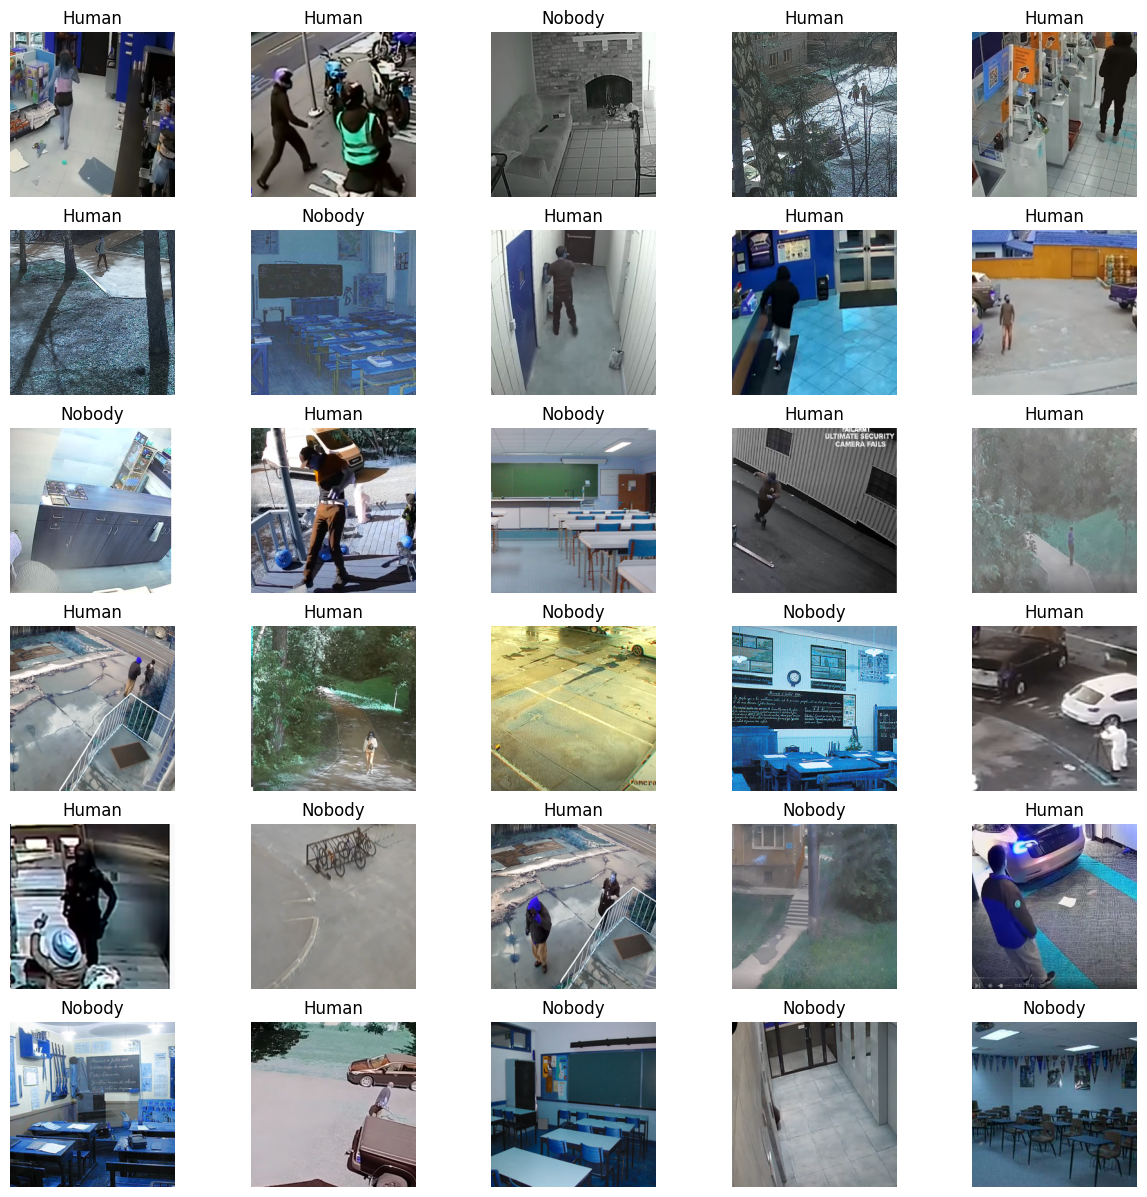

In [11]:
label_list = ['Nobody', 'Human']

plt.figure(figsize=(15, 15))
for i in range(30):
    ax = plt.subplot(6, 5, i+1)
    img = images[i]
    label = label_list[labels[i]]
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')

### train test split

In [12]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2)

In [13]:
print(f'X_train shape : {X_train.shape}')
print(f'y_train shape : {y_train.shape}')
print(f'X_val shape : {X_val.shape}')
print(f'y_val shape : {y_val.shape}')

X_train shape : (736, 256, 256, 3)
y_train shape : (736,)
X_val shape : (185, 256, 256, 3)
y_val shape : (185,)


### Augmentation

In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

### Model

In [15]:
model = tf.keras.models.Sequential()

In [16]:
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 127, 127, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 16)       0

In [332]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy', 'Recall', 'Precision'])

In [266]:
model.fit(
    train_data,
    train_labels,
    batch_size=32,
    validation_data=(validation_data, validation_labels),
    epochs=100
)

Epoch 1/100
23/23 [==============================] - 1s 36ms/step - loss: 0.6731 - accuracy: 0.6060 - recall: 0.9865 - precision: 0.6072 - val_loss: 0.6659 - val_accuracy: 0.6162 - val_recall: 1.0000 - val_precision: 0.6162
Epoch 2/100
23/23 [==============================] - 1s 35ms/step - loss: 0.6643 - accuracy: 0.6005 - recall: 0.9371 - precision: 0.6105 - val_loss: 0.6678 - val_accuracy: 0.6270 - val_recall: 0.9649 - val_precision: 0.6286
Epoch 3/100
23/23 [==============================] - 1s 35ms/step - loss: 0.6430 - accuracy: 0.6155 - recall: 0.9258 - precision: 0.6224 - val_loss: 0.6610 - val_accuracy: 0.6216 - val_recall: 1.0000 - val_precision: 0.6196
Epoch 4/100
23/23 [==============================] - 1s 34ms/step - loss: 0.6272 - accuracy: 0.6508 - recall: 0.8539 - precision: 0.6643 - val_loss: 0.6191 - val_accuracy: 0.6270 - val_recall: 0.9825 - val_precision: 0.6257
Epoch 5/100
23/23 [==============================] - 1s 35ms/step - loss: 0.5821 - accuracy: 0.6739 - re

23/23 [==============================] - 1s 34ms/step - loss: 0.0028 - accuracy: 0.9986 - recall: 0.9978 - precision: 1.0000 - val_loss: 2.3867 - val_accuracy: 0.7297 - val_recall: 0.8333 - val_precision: 0.7540
Epoch 74/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0025 - accuracy: 0.9973 - recall: 0.9978 - precision: 0.9978 - val_loss: 2.3599 - val_accuracy: 0.7243 - val_recall: 0.8246 - val_precision: 0.7520
Epoch 75/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0021 - accuracy: 0.9986 - recall: 1.0000 - precision: 0.9978 - val_loss: 2.3795 - val_accuracy: 0.7243 - val_recall: 0.8246 - val_precision: 0.7520
Epoch 76/100
23/23 [==============================] - 1s 34ms/step - loss: 0.0021 - accuracy: 0.9986 - recall: 1.0000 - precision: 0.9978 - val_loss: 2.4091 - val_accuracy: 0.7135 - val_recall: 0.8070 - val_precision: 0.7480
Epoch 77/100
23/23 [==============================] - 1s 35ms/step - loss: 0.0019 - accuracy: 0.9986 - recall: 0.

In [271]:
model.fit(
    train_data,
    train_labels,
    batch_size=32,
    validation_data=(validation_data, validation_labels),
    epochs=100
)

Epoch 1/100
23/23 [==============================] - 2s 51ms/step - loss: 0.7923 - accuracy: 0.5707 - recall: 0.6831 - precision: 0.6347 - val_loss: 1.6011 - val_accuracy: 0.3838 - val_recall: 0.0351 - val_precision: 0.5000
Epoch 2/100
23/23 [==============================] - 1s 42ms/step - loss: 0.7514 - accuracy: 0.6168 - recall: 0.7775 - precision: 0.6541 - val_loss: 0.7354 - val_accuracy: 0.6108 - val_recall: 0.9825 - val_precision: 0.6154
Epoch 3/100
23/23 [==============================] - 1s 42ms/step - loss: 0.6457 - accuracy: 0.6495 - recall: 0.7775 - precision: 0.6851 - val_loss: 0.7972 - val_accuracy: 0.6108 - val_recall: 0.9474 - val_precision: 0.6207
Epoch 4/100
23/23 [==============================] - 1s 42ms/step - loss: 0.5795 - accuracy: 0.6848 - recall: 0.7865 - precision: 0.7187 - val_loss: 0.6528 - val_accuracy: 0.6649 - val_recall: 0.9211 - val_precision: 0.6646
Epoch 5/100
23/23 [==============================] - 1s 42ms/step - loss: 0.5689 - accuracy: 0.7296 - re

23/23 [==============================] - 1s 42ms/step - loss: 0.0171 - accuracy: 0.9946 - recall: 0.9955 - precision: 0.9955 - val_loss: 1.4792 - val_accuracy: 0.7622 - val_recall: 0.8947 - val_precision: 0.7612
Epoch 74/100
23/23 [==============================] - 1s 42ms/step - loss: 0.0185 - accuracy: 0.9918 - recall: 0.9933 - precision: 0.9933 - val_loss: 1.4062 - val_accuracy: 0.7622 - val_recall: 0.8860 - val_precision: 0.7652
Epoch 75/100
23/23 [==============================] - 1s 42ms/step - loss: 0.0118 - accuracy: 0.9973 - recall: 0.9955 - precision: 1.0000 - val_loss: 1.5461 - val_accuracy: 0.7459 - val_recall: 0.9386 - val_precision: 0.7279
Epoch 76/100
23/23 [==============================] - 1s 42ms/step - loss: 0.0069 - accuracy: 0.9973 - recall: 0.9978 - precision: 0.9978 - val_loss: 1.4519 - val_accuracy: 0.7892 - val_recall: 0.9386 - val_precision: 0.7698
Epoch 77/100
23/23 [==============================] - 1s 42ms/step - loss: 0.0120 - accuracy: 0.9959 - recall: 0.

In [327]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    batch_size=32,
    validation_data=(X_val, y_val),
    epochs=50
)

Epoch 1/50
23/23 [==============================] - 6s 200ms/step - loss: 0.8659 - accuracy: 0.5516 - recall: 0.6876 - precision: 0.6157 - val_loss: 1.9526 - val_accuracy: 0.3838 - val_recall: 0.0175 - val_precision: 0.5000
Epoch 2/50
23/23 [==============================] - 5s 202ms/step - loss: 0.7366 - accuracy: 0.6223 - recall: 0.7820 - precision: 0.6578 - val_loss: 1.0165 - val_accuracy: 0.5135 - val_recall: 0.3772 - val_precision: 0.6935
Epoch 3/50
23/23 [==============================] - 5s 195ms/step - loss: 0.7295 - accuracy: 0.5842 - recall: 0.7011 - precision: 0.6433 - val_loss: 0.6454 - val_accuracy: 0.6216 - val_recall: 0.8684 - val_precision: 0.6429
Epoch 4/50
23/23 [==============================] - 5s 198ms/step - loss: 0.6415 - accuracy: 0.6440 - recall: 0.8202 - precision: 0.6673 - val_loss: 0.6023 - val_accuracy: 0.6595 - val_recall: 0.9737 - val_precision: 0.6491
Epoch 5/50
23/23 [==============================] - 5s 198ms/step - loss: 0.6231 - accuracy: 0.6685 - re

In [336]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.0001)

In [337]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,
    batch_size=32,
    validation_data=(X_val, y_val),
    epochs=100,
    callbacks=[reduce_lr]
)

Epoch 1/100
23/23 [==============================] - 5s 186ms/step - loss: 0.6163 - accuracy: 0.6726 - recall: 0.8247 - precision: 0.6925 - val_loss: 0.5739 - val_accuracy: 0.7135 - val_recall: 0.7895 - val_precision: 0.7563 - lr: 0.0010
Epoch 2/100
23/23 [==============================] - 4s 192ms/step - loss: 0.5814 - accuracy: 0.6861 - recall: 0.8719 - precision: 0.6904 - val_loss: 0.5441 - val_accuracy: 0.7351 - val_recall: 0.7632 - val_precision: 0.7982 - lr: 0.0010
Epoch 3/100
23/23 [==============================] - 4s 193ms/step - loss: 0.5737 - accuracy: 0.7065 - recall: 0.8292 - precision: 0.7250 - val_loss: 0.5396 - val_accuracy: 0.7622 - val_recall: 0.7895 - val_precision: 0.8182 - lr: 0.0010
Epoch 4/100
23/23 [==============================] - 5s 196ms/step - loss: 0.5461 - accuracy: 0.7323 - recall: 0.8539 - precision: 0.7422 - val_loss: 0.5024 - val_accuracy: 0.7676 - val_recall: 0.7982 - val_precision: 0.8198 - lr: 0.0010
Epoch 5/100
23/23 [=============================

Epoch 69/100
23/23 [==============================] - 4s 188ms/step - loss: 0.3048 - accuracy: 0.8723 - recall: 0.9034 - precision: 0.8874 - val_loss: 0.5126 - val_accuracy: 0.7676 - val_recall: 0.8158 - val_precision: 0.8087 - lr: 1.0000e-04
Epoch 70/100
23/23 [==============================] - 4s 188ms/step - loss: 0.2891 - accuracy: 0.8709 - recall: 0.9169 - precision: 0.8755 - val_loss: 0.4795 - val_accuracy: 0.8000 - val_recall: 0.8246 - val_precision: 0.8468 - lr: 1.0000e-04
Epoch 71/100
23/23 [==============================] - 4s 191ms/step - loss: 0.3187 - accuracy: 0.8438 - recall: 0.8831 - precision: 0.8618 - val_loss: 0.4712 - val_accuracy: 0.7946 - val_recall: 0.7982 - val_precision: 0.8585 - lr: 1.0000e-04
Epoch 72/100
23/23 [==============================] - 4s 191ms/step - loss: 0.2827 - accuracy: 0.8818 - recall: 0.9236 - precision: 0.8858 - val_loss: 0.5011 - val_accuracy: 0.7784 - val_recall: 0.8158 - val_precision: 0.8230 - lr: 1.0000e-04
Epoch 73/100
23/23 [========